In [1]:
import sympy as sp
sp.init_printing()
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from IPython.display import Markdown
def d(s):
    display(Markdown(s))

In [13]:
m, g, T1, T2, theta1, theta2 = sp.symbols('m g T1 T2 theta1 theta2')
vertical = sp.Eq(T1*sp.sin(theta1) + T2*sp.sin(theta2), m * g)
horizontal = sp.Eq(T1*sp.cos(theta1), T2*sp.cos(theta2))
d('Vertical equation of motion')
display(vertical)
d('Horizontal equation of motion')
display(horizontal)

Vertical equation of motion

Horizontal equation of motion

In [12]:
d("Vertical equilibrium $\\frac{\\pi}{2}$:")
display(vertical.subs({theta1: sp.pi/2, theta2: sp.pi/2}))
d("Horizontal equilibrium $\\frac{\\pi}{2}$:")
display(horizontal.subs({theta1: sp.pi/2, theta2: sp.pi/2}))
d("Vertical equilibrium $0$:")
display(vertical.subs({theta1: 0, theta2: 0}))
d("Horizontal equilibrium $0$:")
display(horizontal.subs({theta1: 0, theta2: 0}))

Vertical equilibrium $\frac{\pi}{2}$:

Horizontal equilibrium $\frac{\pi}{2}$:

Vertical equilibrium $0$:

Horizontal equilibrium $0$:

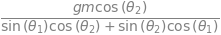

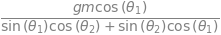

In [15]:
s = sp.solve([vertical, horizontal], (T1, T2))
display(s[T1])
display(s[T2])

<lambdifygenerated-17>:2: RuntimeWarning: divide by zero encountered in divide
  return 9.8*cos(theta2)/(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1))
<lambdifygenerated-18>:2: RuntimeWarning: divide by zero encountered in divide
  return 9.8*cos(theta1)/(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1))
/var/folders/tf/13w2h1hj2r9c95qp4ktjlfhc0000gq/T/ipykernel_46978/3723001011.py:18: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(T1_pcm, ax=axs[0])


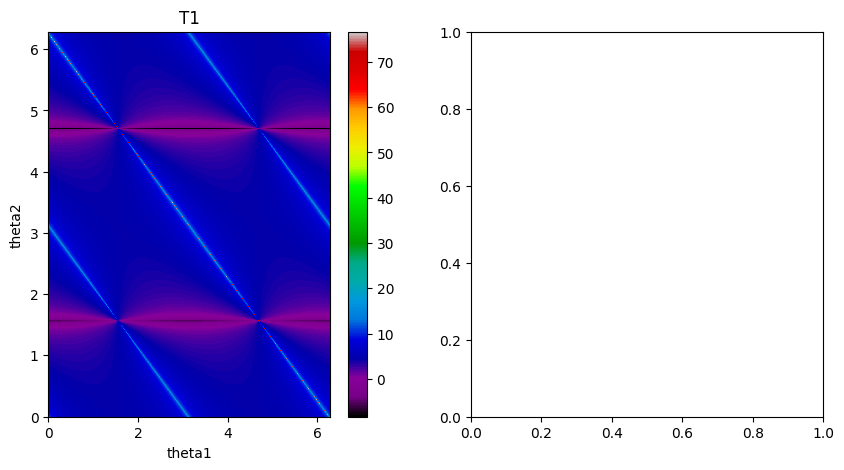

In [24]:
N = 1000
theta1_a = np.linspace(0, np.pi*2, N)
theta2_a = np.linspace(0, np.pi*2, N)
x, y = np.meshgrid(theta1_a, theta2_a)

T1_a = s[T1].subs({m: 1, g: 9.8})
T1_tf = sp.lambdify([theta1, theta2], T1_a, 'numpy')
T2_a = s[T2].subs({m: 1, g: 9.8})
T2_tf = sp.lambdify([theta1, theta2], T2_a, 'numpy')

T1_z = T1_tf(x, y)
T2_z = T2_tf(x, y)
fig, axs = plt.subplots(1, 1, figsize=(10, 1))
T1_pcm = axs[0].pcolor(x, y, np.log(np.abs(T1_z*T1_z)), cmap='nipy_spectral')
axs[0].set_title('T1')
axs[0].set_xlabel('theta1')
axs[0].set_ylabel('theta2')
fig.colorbar(T1_pcm, ax=axs[0])

# T2_pcm = axs[1].pcolor(x, y, np.log(np.abs(T2_z*T2_z)), cmap='nipy_spectral')
# axs[1].set_title('T2')
# axs[1].set_xlabel('theta1')
# axs[1].set_ylabel('theta2')
# fig.colorbar(T2_pcm, ax=axs[1])
plt.show()

In [ ]:
a = tf(theta1_a, theta2_a)
print(a.min(), a.max())
plt.pcolor(x, y, np.log(a), cmap='nipy_spectral')
plt.show()

In [ ]:
plt.plot(theta1_a, tf(theta1_a), label='T1')
#plt.plot(theta1_a, T2_a, label='T2')
plt.legend()
plt.show()